# libraries needed

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

# Upload the credit card dataset :

In [ ]:
Dataframe = pd.read_csv('/content/creditcard.csv')
Dataframe

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Machine Learning :

## Split and SMOTE the dataset

In [ ]:
X = Dataframe.drop(columns = 'Class')
y = Dataframe['Class']

In [ ]:
y.value_counts()

,count
Class,
0,284315
1,492


In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=40)

In [ ]:
smote = SMOTE(random_state=40)
X_train_resampled , y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
y_train_resampled.value_counts()

,count
Class,
0,227450
1,227450


## Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming X_train_resampled, y_train_resampled, X_test, and y_test are defined

# Create the Logistic Regression model with the specified max iterations
model = LogisticRegression(max_iter=1000)

# Fit the model using the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Calculate the training score
train_score = model.score(X_train_resampled, y_train_resampled)
print(f"Logistic Regression Training Accuracy: {train_score:.5f}")

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy score on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy with Oversampling: {test_accuracy:.5f}')

Logistic Regression Training Accuracy: 0.97834
Logistic Regression Accuracy with Oversampling: 0.98917


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
class_report = classification_report(y_pred, y_test)
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56865
           1       0.13      0.94      0.23        97

    accuracy                           0.99     56962
   macro avg       0.56      0.96      0.61     56962
weighted avg       1.00      0.99      0.99     56962



Confusion Matrix :
 [[56254     6]
 [  611    91]]



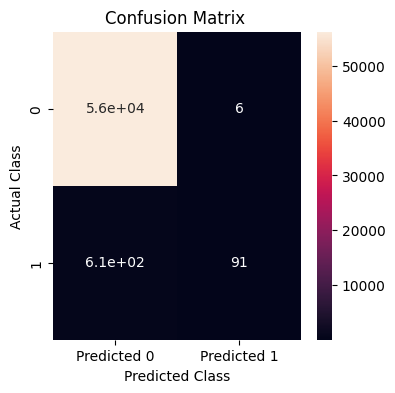

In [ ]:
conf_matrix = confusion_matrix(y_pred,y_test)
print(f"Confusion Matrix :\n {conf_matrix}\n")

plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix, annot=True , xticklabels = ["Predicted 0", "Predicted 1"], yticklabels = ["0" , "1"] )
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title('Confusion Matrix ')
plt.show()

# ROC Curve

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


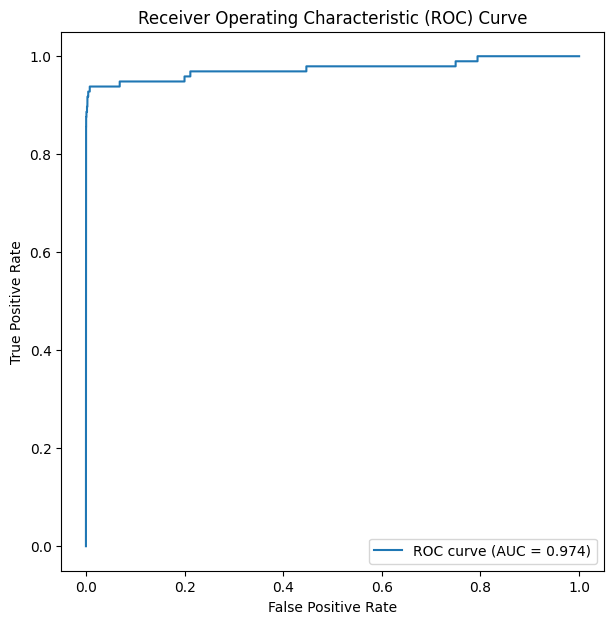

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled , y_train_resampled)
model.score(X_train_resampled , y_train_resampled)
y_pred = model.predict(X_test)

#Determinate the ROC curve:
y_prob = model.predict_proba(X_test)[:,1]
fpr,tpr, thresholds = roc_curve(y_test,y_prob)

#Calculate AUC : Area Under the Curve
roc_auc = auc(fpr,tpr)

#Plot the ROC curve
plt.figure(figsize=(7,7))
plt.plot(fpr,tpr,label= f'ROC curve (AUC = {round(roc_auc,3)})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Random Forest Classifier model

In [ ]:
model = RandomForestClassifier(n_estimators=14, max_depth=11, bootstrap=False,random_state=100)
model.fit(X_train_resampled,y_train_resampled)
model.score(X_train_resampled,y_train_resampled)
y_pred = model.predict(X_test)
print(f'Random Forest Classifier with oversimpling : {accuracy_score(y_pred,y_test):.5f}')

Random Forest Classifier with oversimpling : 0.99900


In [ ]:
print(f'Classification Report : \n {classification_report(y_test,y_pred)}')

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.65      0.90      0.75        97

    accuracy                           1.00     56962
   macro avg       0.82      0.95      0.88     56962
weighted avg       1.00      1.00      1.00     56962



confusion matrix : 
 [[56818    47]
 [   10    87]]


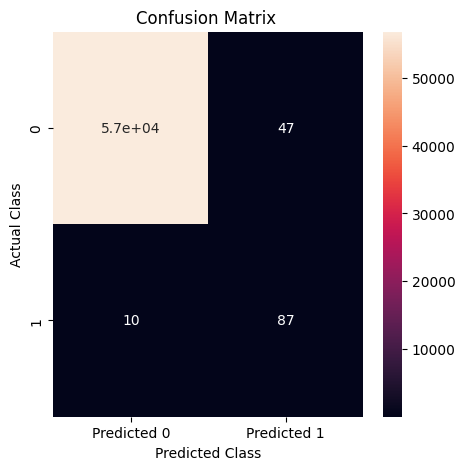

In [ ]:
conf_matrix = confusion_matrix(y_test , y_pred)
print(f"confusion matrix : \n {conf_matrix}")

plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True , xticklabels = ["Predicted 0" , "Predicted 1"], yticklabels = ["0" , "1"])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title('Confusion Matrix ')
plt.show()

## Support Vector Machine model

In [ ]:
print(f'Classification Report : \n {classification_report(y_test,y_pred)}\n')

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.65      0.90      0.75        97

    accuracy                           1.00     56962
   macro avg       0.82      0.95      0.88     56962
weighted avg       1.00      1.00      1.00     56962




confusion matrix : 
 [[56818    47]
 [   10    87]]



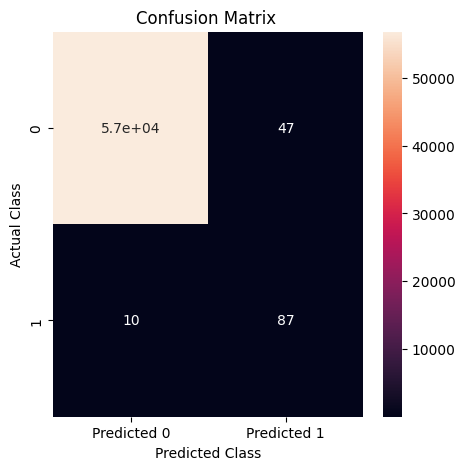

In [ ]:
conf_matrix = confusion_matrix(y_test , y_pred)
print(f"confusion matrix : \n {conf_matrix}\n")

plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True , xticklabels = ["Predicted 0" , "Predicted 1"], yticklabels = ["0" , "1"])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title('Confusion Matrix ')
plt.show()

## Gradient Boosting Classifier

In [ ]:
model = GradientBoostingClassifier(max_depth=3)
model.fit(X_train_resampled,y_train_resampled)
model.score(X_train_resampled,y_train_resampled)
y_pred = model.predict(X_test)

print(f'Gradient Boosting Classifier with oversimpling : {accuracy_score(y_pred,y_test):.5f}')

Gradient Boosting Classifier with oversimpling : 0.99321


In [ ]:
print(f'Classification Report : \n {classification_report(y_test,y_pred)}')

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56865
           1       0.19      0.92      0.32        97

    accuracy                           0.99     56962
   macro avg       0.60      0.96      0.66     56962
weighted avg       1.00      0.99      1.00     56962



confusion matrix : 
 [[56486   379]
 [    8    89]]


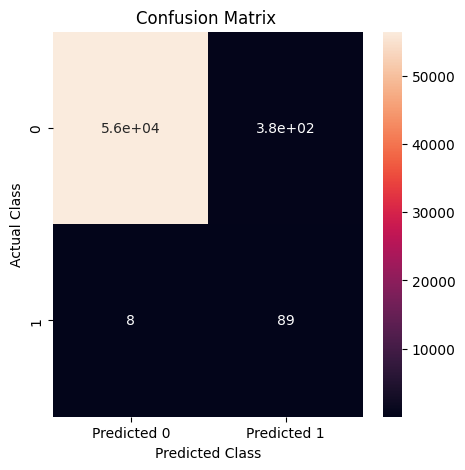

In [ ]:
conf_matrix = confusion_matrix(y_test , y_pred)
print(f"confusion matrix : \n {conf_matrix}")

plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True , xticklabels = ["Predicted 0" , "Predicted 1"], yticklabels = ["0" , "1"])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title('Confusion Matrix ')
plt.show()